<a href="https://colab.research.google.com/github/LeratoMatlala1/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales


Author: Lerato Matlala

## Project Overview

---
The primary objective of the Sales Prediction Project is to use regression models to provide precise and dependable predictions of sales. The main focus of this project is on regression models, specifically linear regression and random forest regression. This choice of models highlights the aim of developing predictive tools that can effectively analyze the complex connections between different factors, including product attributes, outlet characteristics, and historical sales data. By doing a thorough exploratory data analysis, our objective is to get a full understanding of the complexity of the information, discern patterns and trends, and ensure the data is cleansed to facilitate trustworthy analysis. The project aims to boost capabilities in correctly predicting sales patterns via the use of regression models.

## Load and Inspect Data

***Import Libraries***

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

set_config(transform_output='pandas')

***Loading the data from path***

In [3]:
filepath = '/content/drive/MyDrive/Coding Dojo/Week 2/Assignments/sales_predictions_2023.csv'

Salesdf = pd.read_csv(filepath)

#Display top 5 rows of the dataframe
Salesdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Print summary information about the dataframe
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

***Get the number of rows and columns.***

In [5]:
Salesdf.shape

(8523, 12)

- There are 8523 rows and 12 colums in the dataframe

***Check the datatypes of each variable***



In [6]:
Salesdf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

***Check if there are there duplicates***

In [7]:
Salesdf.duplicated().sum()

0

- There are no duplicates in the data



***Identify missing values.***

In [8]:
Salesdf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are missing values in the Item_Weight and Outlet_Size columns

***Fixing any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).***

In [9]:
#First determine the categorical columns
CatColumns = Salesdf.select_dtypes(object).columns
CatColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
#determinine the unique values in the categorical columns
Salesdf[CatColumns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [11]:
#display the values for all categoriavl columns except for Item_Identifier as it has a lot of values
CatColumns = Salesdf.select_dtypes(object).columns.drop('Item_Identifier')

for i in CatColumns:
    print(f'Value counts for {i}')
    print(Salesdf[i].value_counts())
    print('\n')

Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, 

- Item_Fat_Content has inconsitent values:'LF', 'reg', 'low fat'


In [12]:
#replacing the inconsistent values with the correct values
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace('reg','Regular')

In [13]:
#Checking if the values have been fixed
Salesdf['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

***Obtain the summary statistics for numerical features***

In [14]:
#Get all numeric columns
NumColumns = Salesdf.select_dtypes('number').columns
NumColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
#show summary statistics for the numeric columns
Salesdf[NumColumns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the first and most important step in the data analysis process. Its main goal is to dig into the details of a dataset and find useful information. This methodical approach uses a variety of statistical and graphic methods to learn more about the trends, connections, and possible outliers in the data.

### Univariate Analysis

#### Histograms

Using Seaborn to plot the histograms for each numerical feature in the data

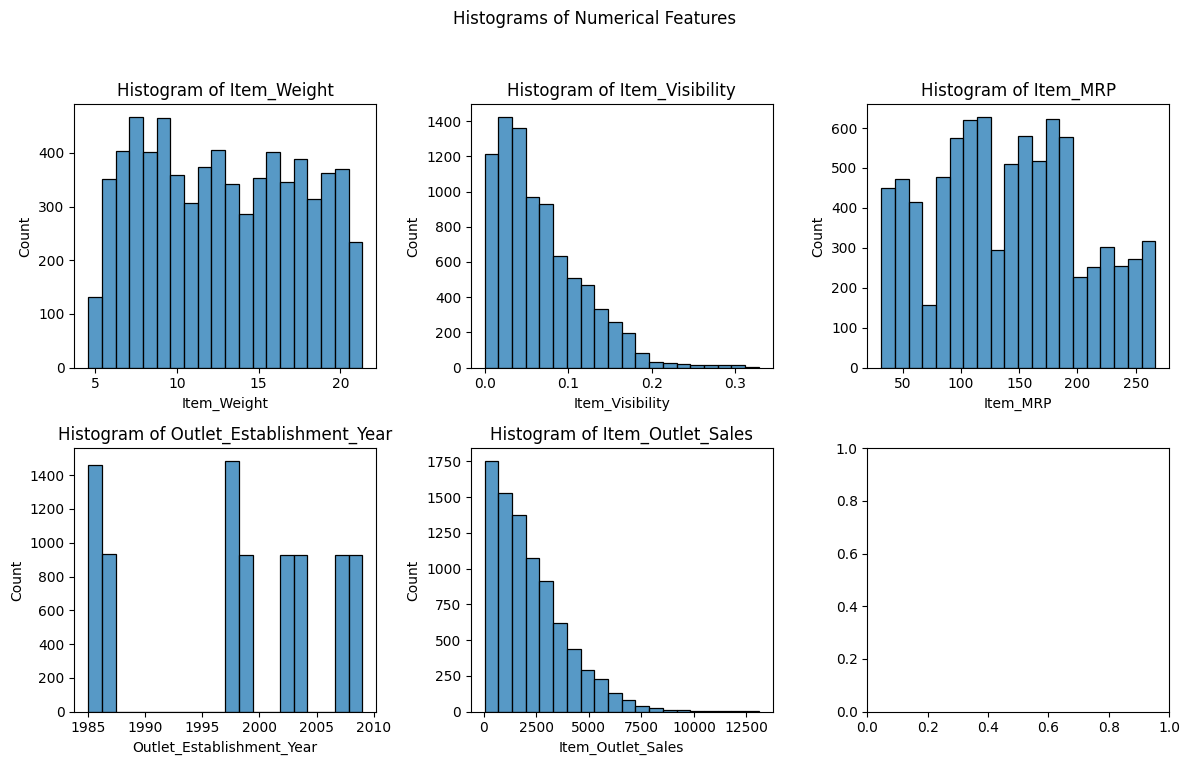

In [16]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting histograms for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=Salesdf, x=feature, bins=20,  ax=ax[row, col])
    ax[row, col].set_title(f"Histogram of {feature}")

plt.suptitle("Histograms of Numerical Features")

# Adjusting the layout to avoid overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

#### Boxplots

Creating boxplots to view statistical summaries of numerical features

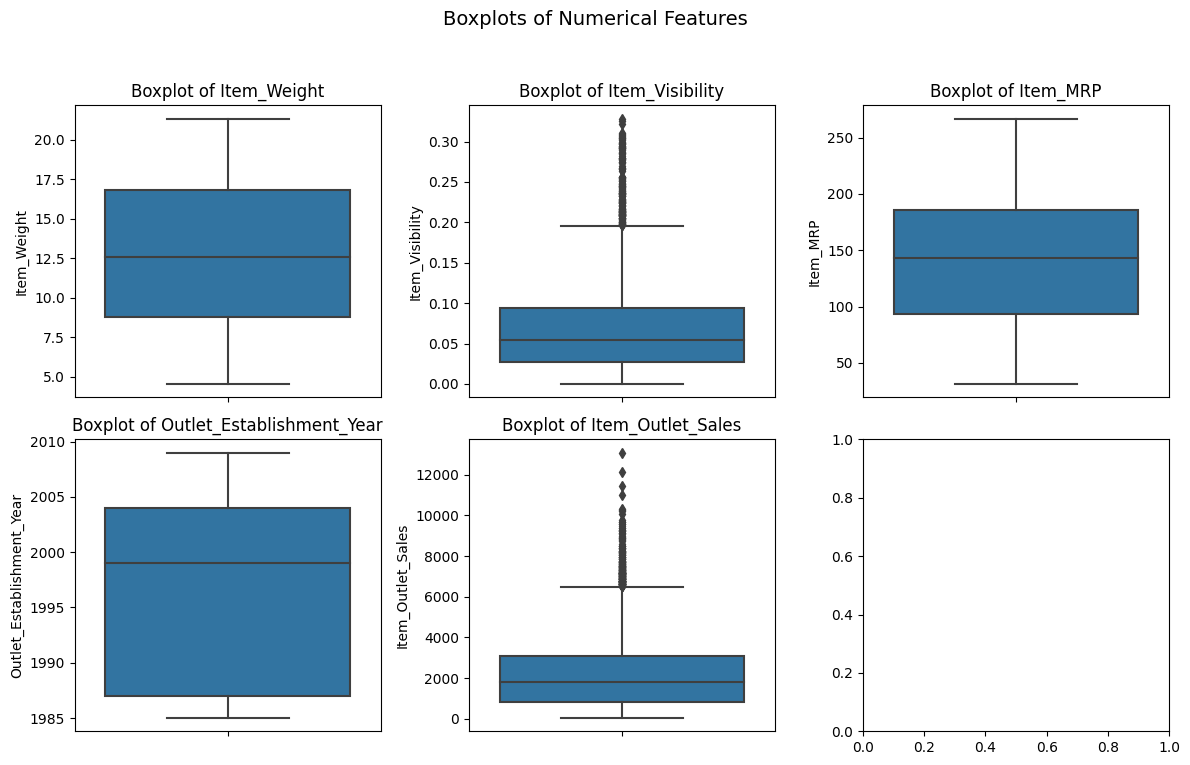

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=Salesdf, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


#### Countplots

Creating counplots to analyse the distribution of categorical features

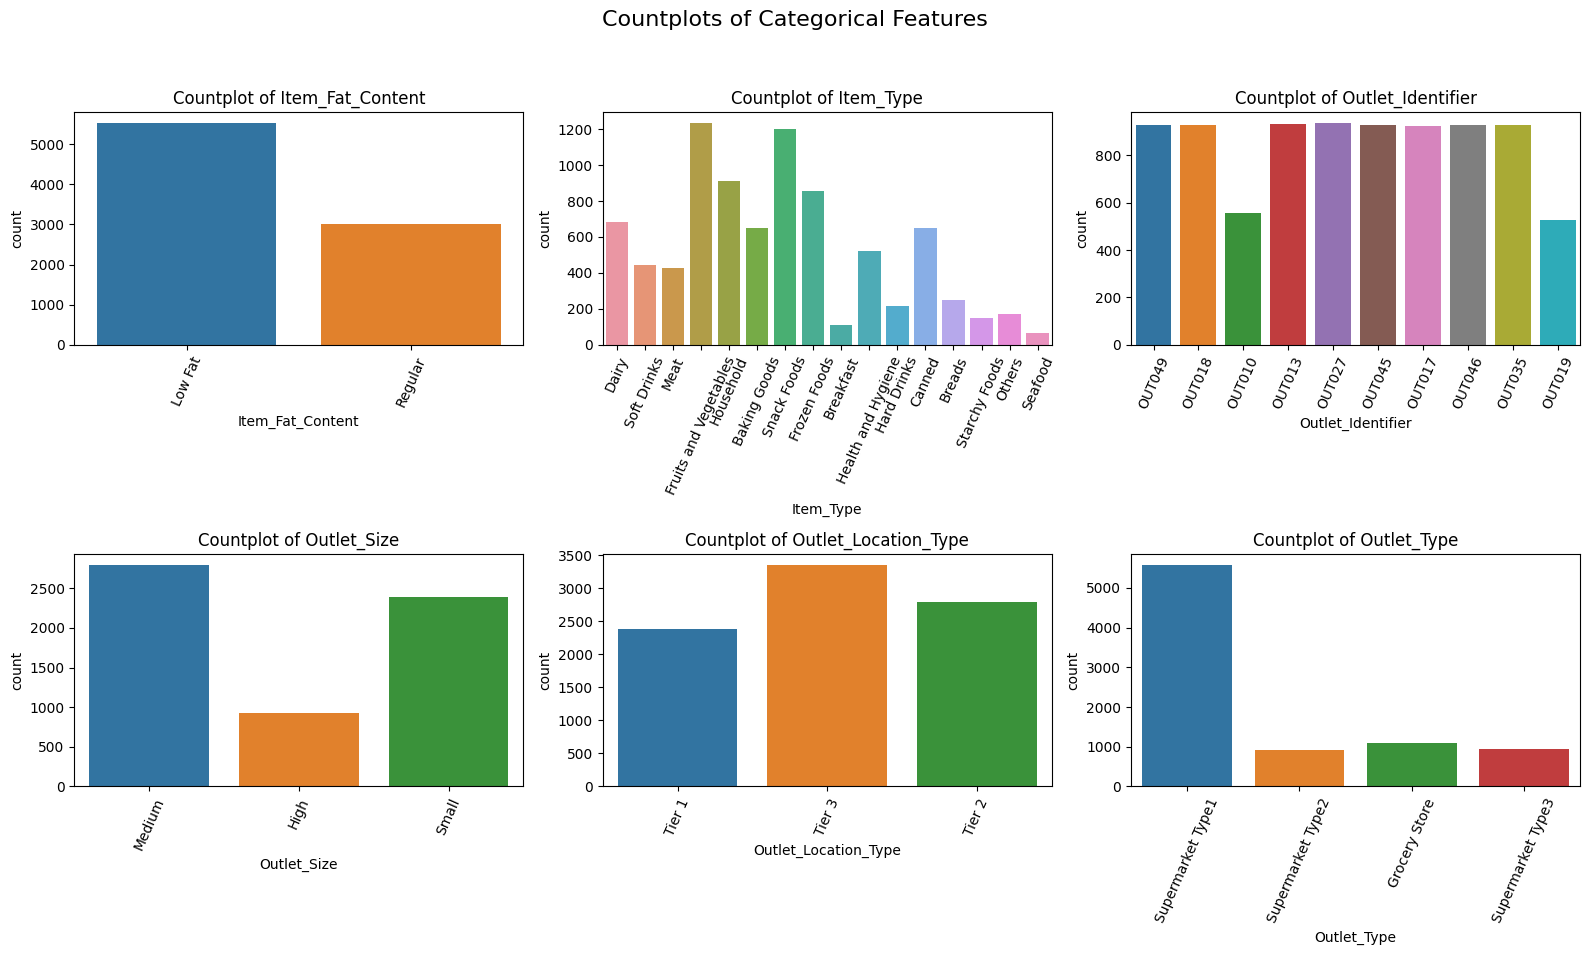

In [18]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plotting countplots for each categorical feature on its own subplot using Seaborn
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=Salesdf, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.suptitle("Countplots of Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


### Multivariate Analysis

#### Correlation Heatmap

Creating a correlation heatmap to visualize the pairwise correlation between the numerical features

<ipython-input-19-38fb966f9e89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Salesdf.corr()


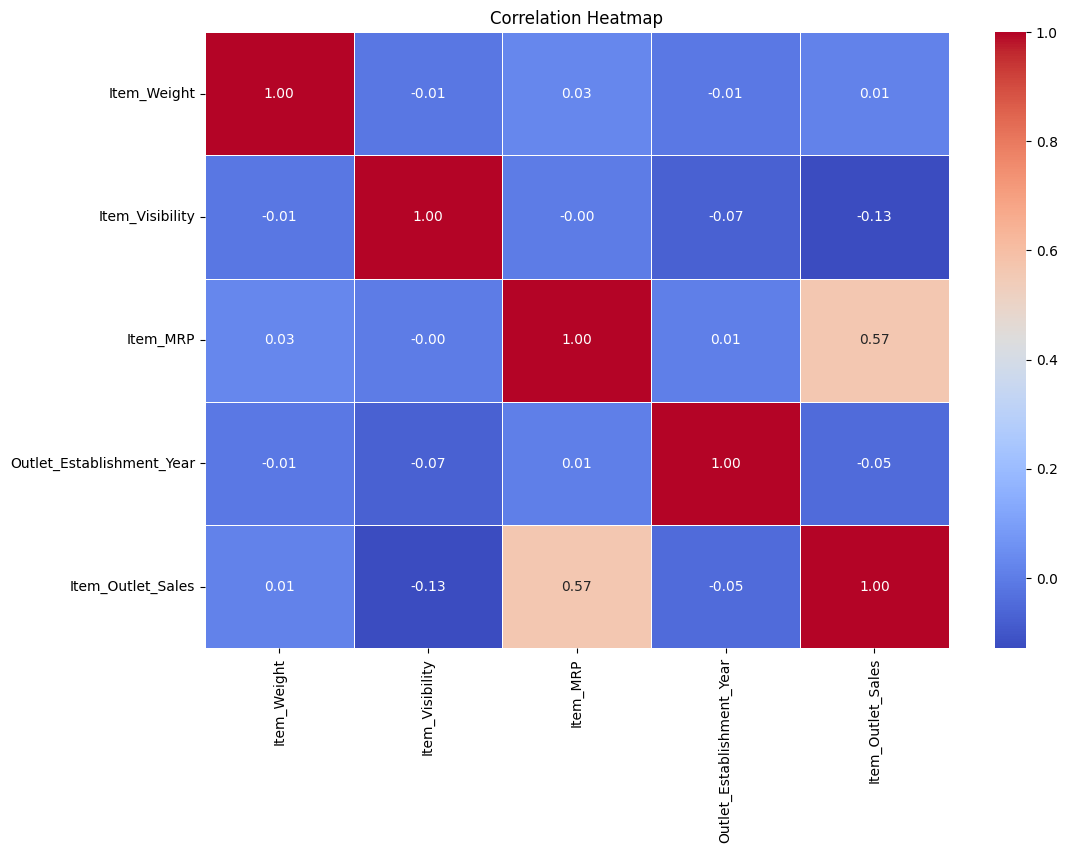

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = Salesdf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap");

#### Regression Plots

Creating regression plots to summarise and assess the relationship between numerical features and Item Outlet Sales

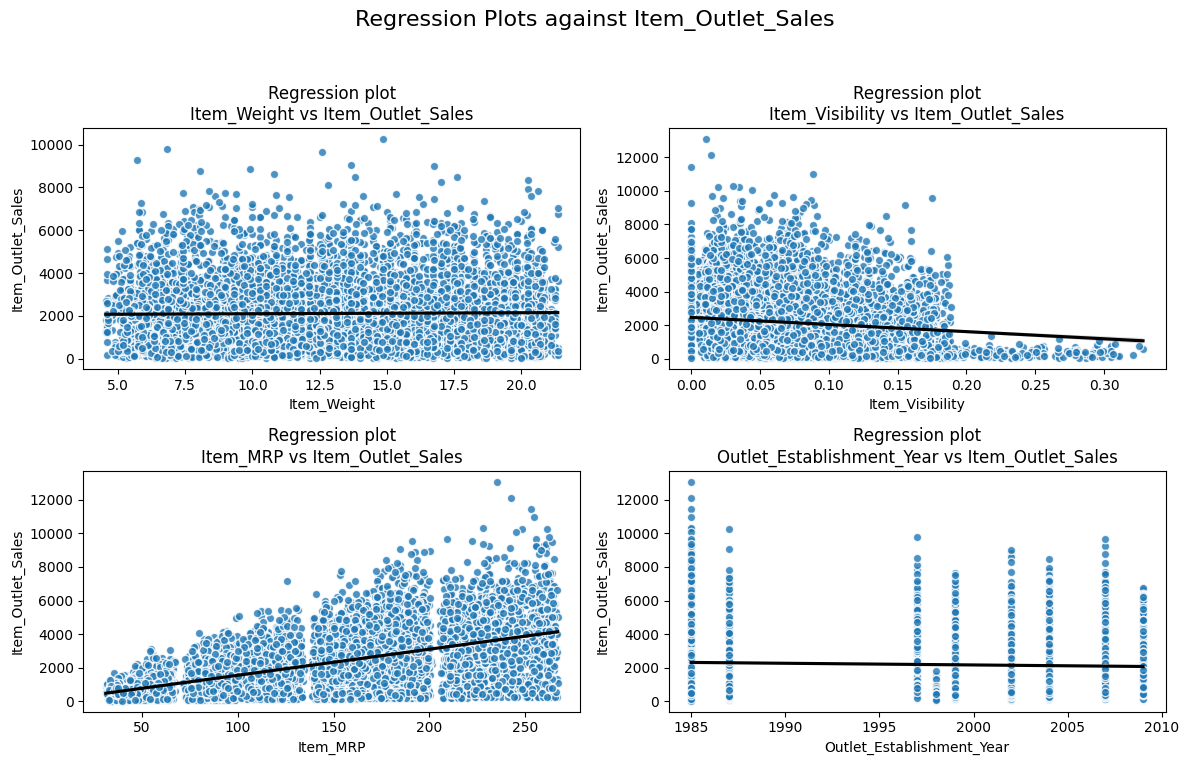

In [20]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting regression plots for each numerical feature against 'Item_Outlet_Sales'
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.regplot(data=Salesdf, x=feature, y='Item_Outlet_Sales', ax=axes[row, col],
                line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
    axes[row, col].set_title(f"Regression plot\n{feature} vs Item_Outlet_Sales")

plt.suptitle("Regression Plots against Item_Outlet_Sales", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

## Explanatory Data Analysis

The primary objective of ExDA is to interpret and quantify the insights that are unearthed during the exploratory phase. The objective of ExDA is to provide comprehensive interpretations of the relationshipd, trends, and patterns seen in the data, often including statistical modeling and more sophisticated visualization methods.


### Feature Inspection

In [21]:
#Function for Categorical featues
def analyze_categorical_feature(df, feature_name):
    """
    Perform analysis for a given categorical feature.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the categorical feature to analyze.

    Returns:
        None
    """

    ax = sns.countplot(data=df, x=feature_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"\nNumber of rows with null values in '{feature_name}' column: {null_values}")
    print(f"Percentage of null values in '{feature_name}' column: {percentage_null_values:.2f}%")

    # Determine if the feature is quasi-constant or constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [22]:
#Function for numerical features

def analyze_numeric_feature(df, feature_name):
    """
    Perform analysis for a specific numeric feature in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the numeric feature to analyze.

    Returns:
        None
    """

    # Plot the box plot for the numeric feature
    ax = sns.boxplot(data=df, x=feature_name)
    ax.set_title(f"Box Plot for {feature_name}")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Value")
    ax.figure.show()

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"Number of rows with null values: {null_values}")
    print(f"Percentage of null values: {percentage_null_values:.2f}%")

    # Determine if the feature is constant or quasi-constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [23]:
#Function for plotting multivariate visualisations between fatures and target

def plot_feature_vs_target(df, feature_name):
    """
    Plot a bar plot for categorical features and a scatter plot for numerical features against the target variable.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the feature to plot against the target variable.

    Returns:
        None
    """
    if feature_name not in df.columns:
        print(f"'{feature_name}' feature not found in the DataFrame.")
        return

    target_variable = 'Item_Outlet_Sales'
    data_type = df[feature_name].dtype

    if data_type == 'object' or data_type == 'category':
        # Categorical feature, create a bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()
    else:
        # Numerical feature, create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.grid(True)
        plt.show()




***Item_Identifier***

Product ID


Number of rows with null values in 'Item_Identifier' column: 0
Percentage of null values in 'Item_Identifier' column: 0.00%
'Item_Identifier' is Not constant or quasi-constant.
The cardinality of 'Item_Identifier' feature is: 1559


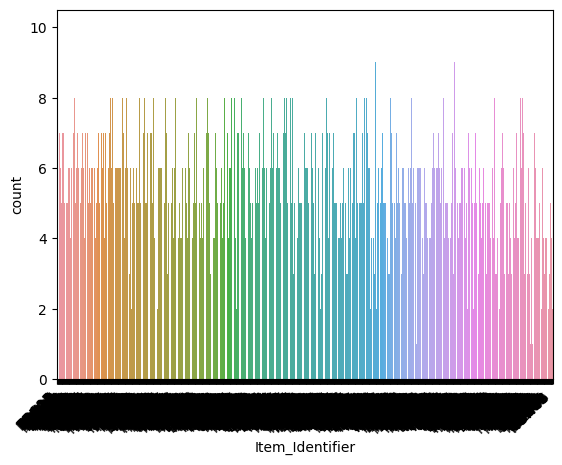

In [24]:
analyze_categorical_feature(Salesdf, 'Item_Identifier')

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

> *This column is an identifier, and can therefore not be regarded as a feature that will be passed into a machine learning model*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

> *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
> *No, it is not*

4. What is the cardinality? Is it high (>10)?
> *Feaure has 1559 unique value, it has high cardinality*

5. Would we know this feature before the target is determined?
> *Yes*

6. Is there a business case/understanding reason to exclude based on our business case?

> *The feature is a an identifier, therefore, it can be excluded*


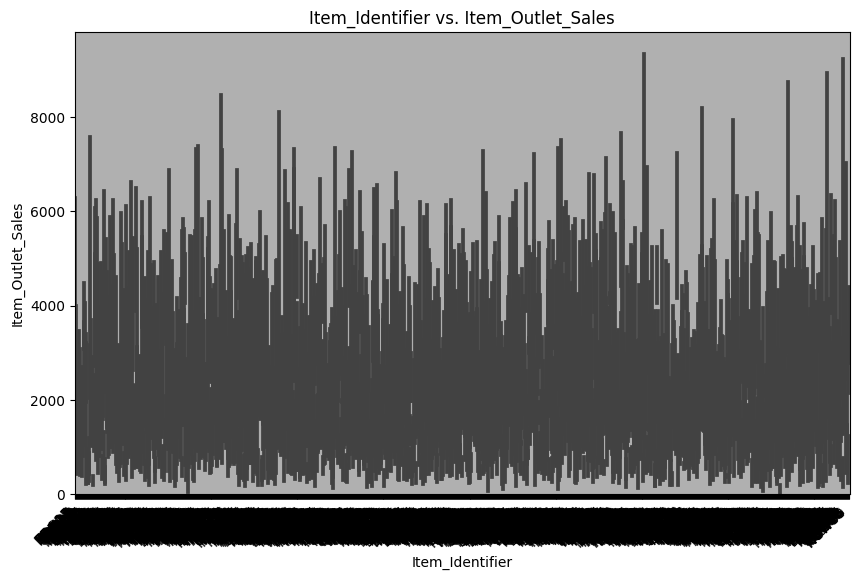

In [25]:
#Plot Item Identifier against the target
plot_feature_vs_target(Salesdf, 'Item_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No, because this is an identifier*

2. Does this feature appear to be a predictor of the target?
    *   *No, it does not*





***Item_Weight***

Weight of product

Number of rows with null values: 1463
Percentage of null values: 17.17%
'Item_Weight' is Not constant or quasi-constant.
The cardinality of 'Item_Weight' feature is: 415


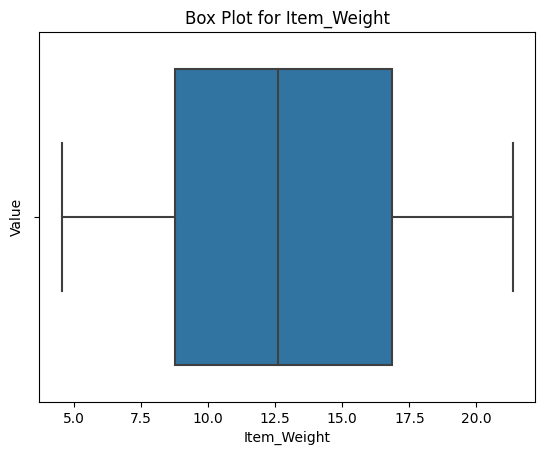

In [26]:
analyze_numeric_feature(Salesdf, 'Item_Weight')

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Item_Type is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *1463 / 17.17% null values, therefore given the high percentage of nulls in the data for this feature, it would not be recommended for the rows to be dropped. Therefore the missing values will be filled with a zero (0) value*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 415 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


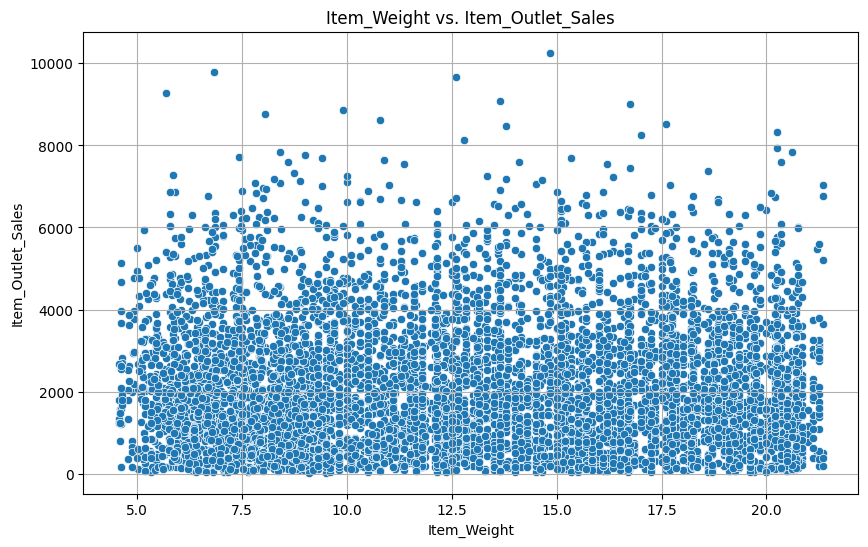

In [27]:
#Plot Item_Weight against the target
plot_feature_vs_target(Salesdf, 'Item_Weight')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No, A heavy item does not necessarily mean that it costs more*

2. Does this feature appear to be a predictor of the target?
    *   *No, it does not*





***Item_Fat_Content***

Whether the product is low-fat or regular


Number of rows with null values in 'Item_Fat_Content' column: 0
Percentage of null values in 'Item_Fat_Content' column: 0.00%
'Item_Fat_Content' is Not constant or quasi-constant.
The cardinality of 'Item_Fat_Content' feature is: 2


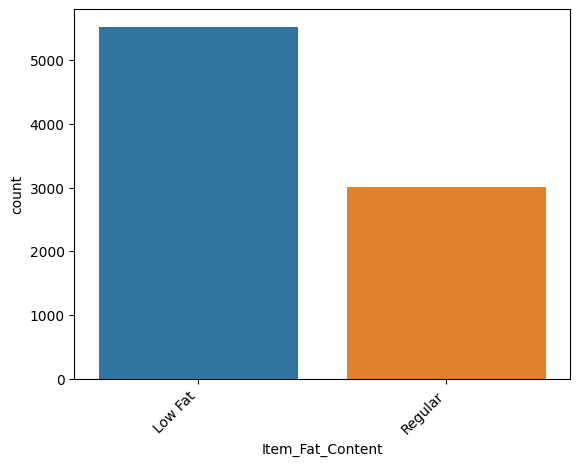

In [28]:
analyze_categorical_feature(Salesdf, 'Item_Fat_Content');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

> *Item_Fat_Content is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

> *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
> *No, it is not*

4. What is the cardinality? Is it high (>10)?
> *Feaure has 2 unique values, it has low cardinality*

5. Would we know this feature before the target is determined?
> *Yes*

6. Is there a business case/understanding reason to exclude based on our business case?

> *No*


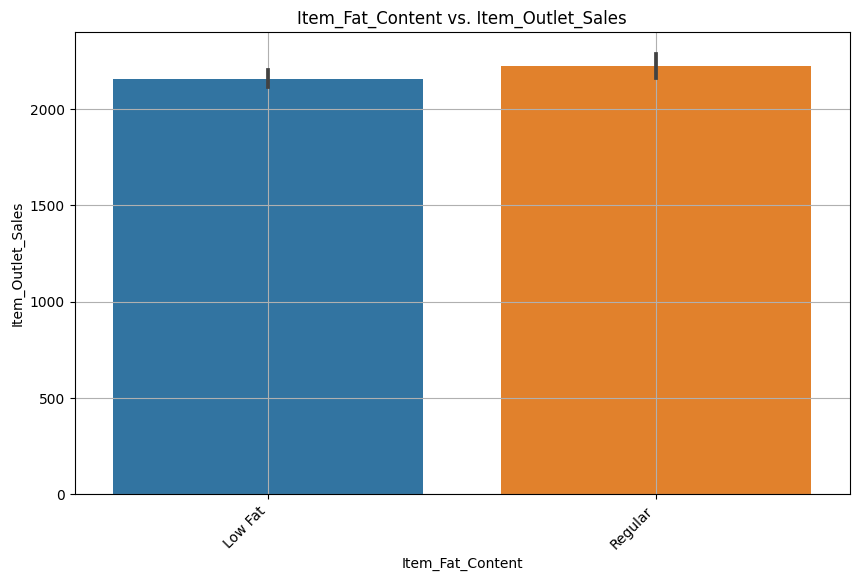

In [29]:
#Plot Item_Fat_Content against the target
plot_feature_vs_target(Salesdf, 'Item_Fat_Content')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No*

2. Does this feature appear to be a predictor of the target?
    *   *No*





***Item_Visibility***

The percentage of total display area of all products in a store allocated to the particular product

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Visibility' is Not constant or quasi-constant.
The cardinality of 'Item_Visibility' feature is: 7880


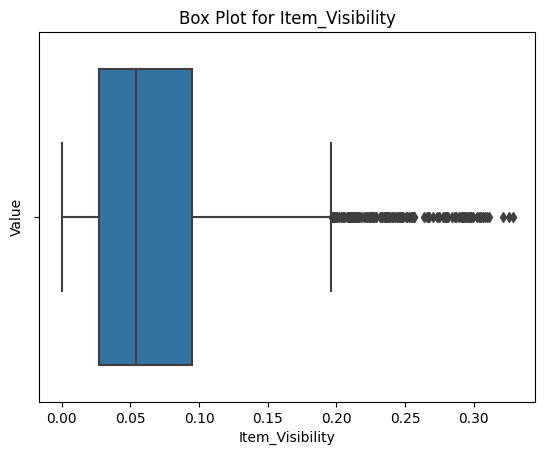

In [30]:
analyze_numeric_feature(Salesdf, 'Item_Visibility');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 7880 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


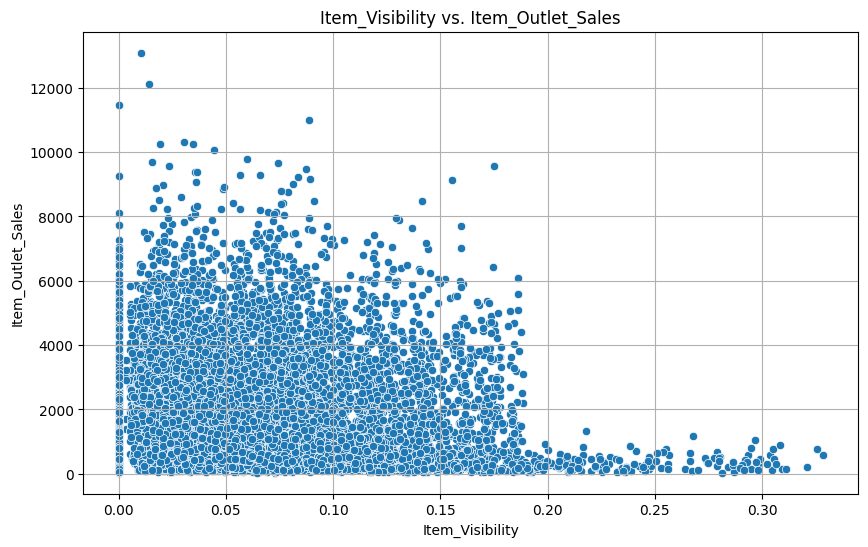

In [31]:
#Plot Item_Visibility against the target
plot_feature_vs_target(Salesdf, 'Item_Visibility')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, I would expect items with more visibility to yield more sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, but the items with lower visibility have higher the sales*


***Item_Type***

The category to which the product belongs


Number of rows with null values in 'Item_Type' column: 0
Percentage of null values in 'Item_Type' column: 0.00%
'Item_Type' is Not constant or quasi-constant.
The cardinality of 'Item_Type' feature is: 16


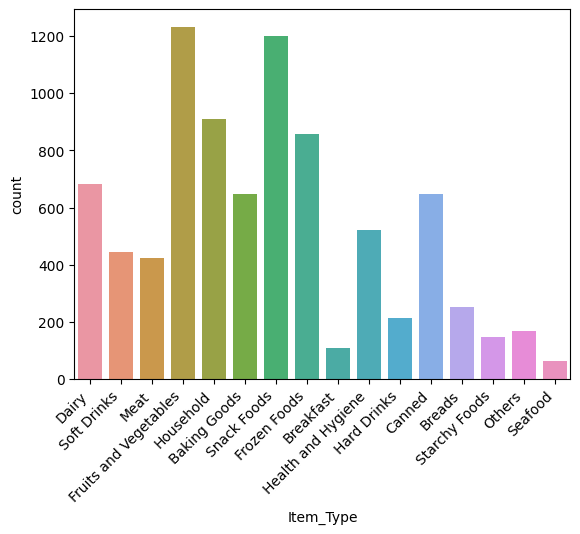

In [32]:
analyze_categorical_feature(Salesdf, 'Item_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Item_Type is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 16 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


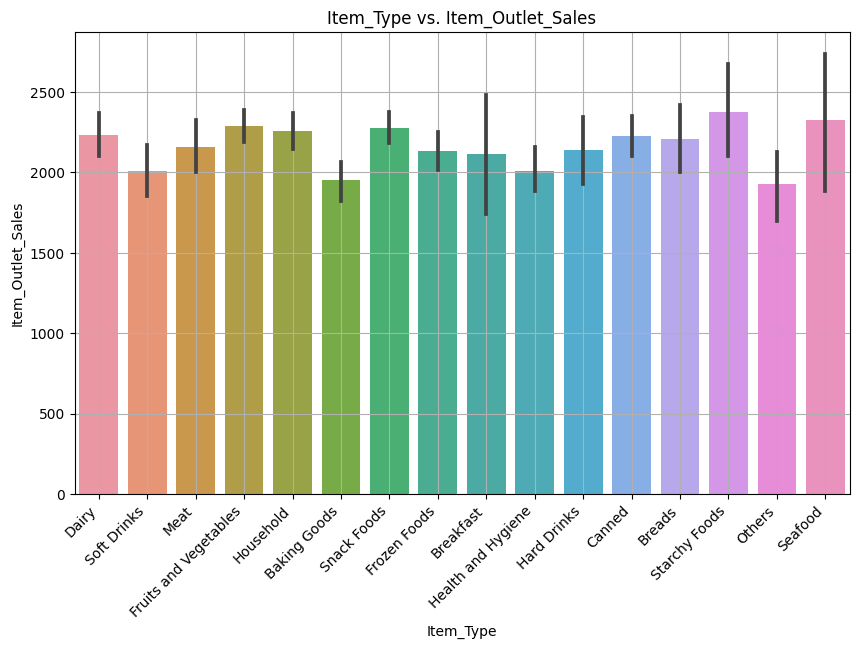

In [33]:
#Plot Item_Type against the target
plot_feature_vs_target(Salesdf, 'Item_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, most loved items might yield more sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, seafood and startchy food have higher sales*





***Item_MRP***

Maximum Retail Price (list price) of the product

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_MRP' is Not constant or quasi-constant.
The cardinality of 'Item_MRP' feature is: 5938


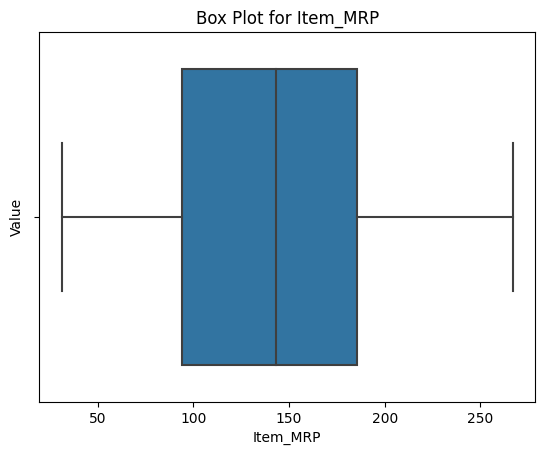

In [34]:
analyze_numeric_feature(Salesdf, 'Item_MRP');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 5938 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


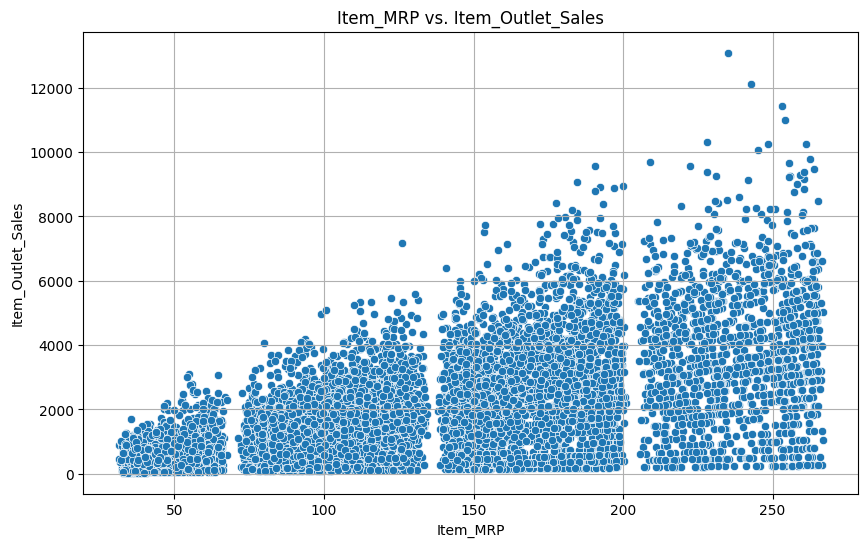

In [35]:
#Plot Item_MRP against the target
plot_feature_vs_target(Salesdf, 'Item_MRP')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, items with higher MRP would yield more Sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, sales a higher for items with higher MRP, there is a positive correlation between MRP and Sales*





***Outlet_Identifier***

Store ID


Number of rows with null values in 'Outlet_Identifier' column: 0
Percentage of null values in 'Outlet_Identifier' column: 0.00%
'Outlet_Identifier' is Not constant or quasi-constant.
The cardinality of 'Outlet_Identifier' feature is: 10


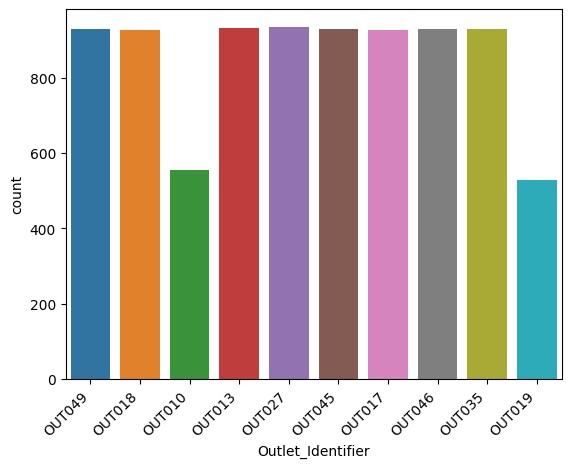

In [36]:
analyze_categorical_feature(Salesdf, 'Outlet_Identifier');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 10 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


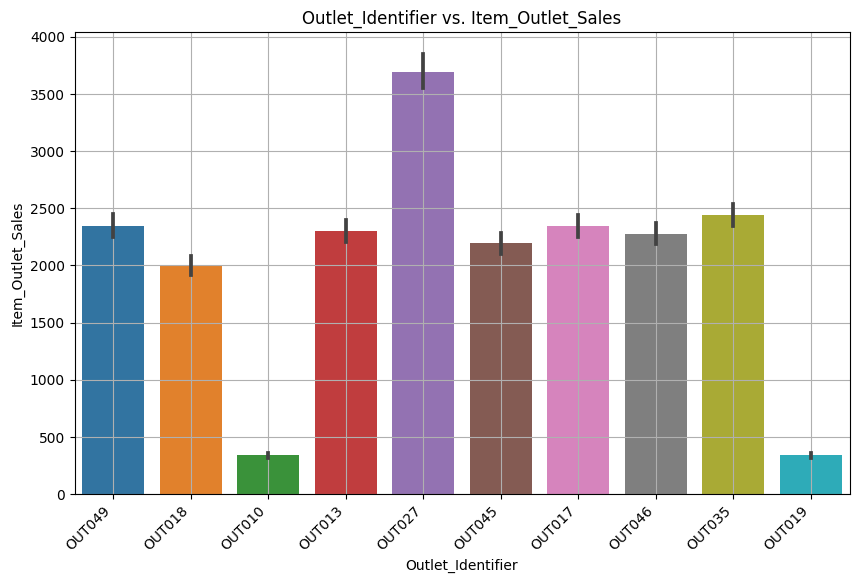

In [37]:
#Plot Outlet_Identifier against the target
plot_feature_vs_target(Salesdf, 'Outlet_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes,some outlets might have more sales than others*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, OUT027, seems to have the most sales*





***Outlet_Establishment_Year***

The year in which store was established

Number of rows with null values: 0
Percentage of null values: 0.00%
'Outlet_Establishment_Year' is Not constant or quasi-constant.
The cardinality of 'Outlet_Establishment_Year' feature is: 9


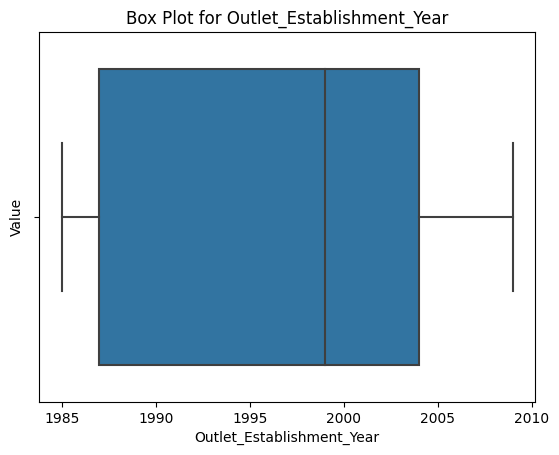

In [38]:
analyze_numeric_feature(Salesdf, 'Outlet_Establishment_Year');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 9 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


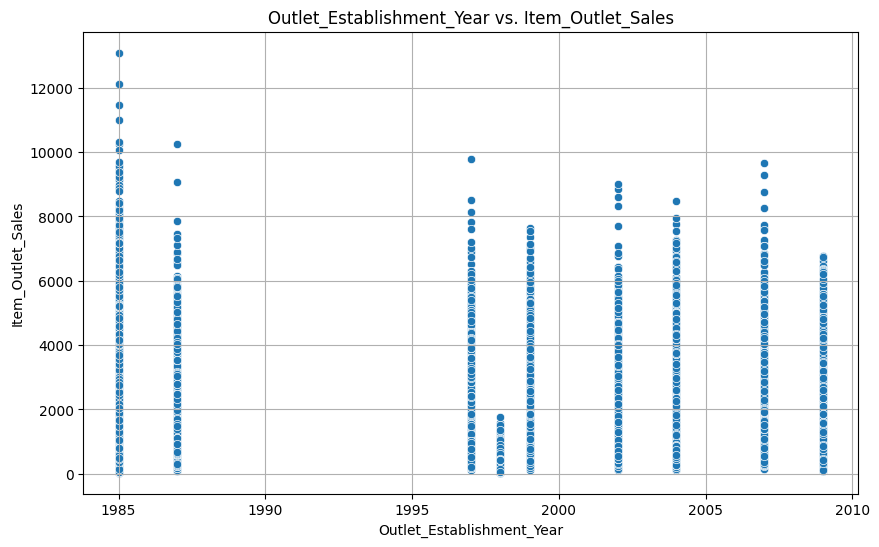

In [39]:
#Plot Outlet_Establishment_Year against the target
plot_feature_vs_target(Salesdf, 'Outlet_Establishment_Year')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect older establishments to have higher sales than newer establishments*

2. Does this feature appear to be a predictor of the target?
    *   *No, the correlation between this feature and sales is not clear*





***Outlet_Size***

The size of the store in terms of ground area covered


Number of rows with null values in 'Outlet_Size' column: 2410
Percentage of null values in 'Outlet_Size' column: 28.28%
'Outlet_Size' is Not constant or quasi-constant.
The cardinality of 'Outlet_Size' feature is: 3


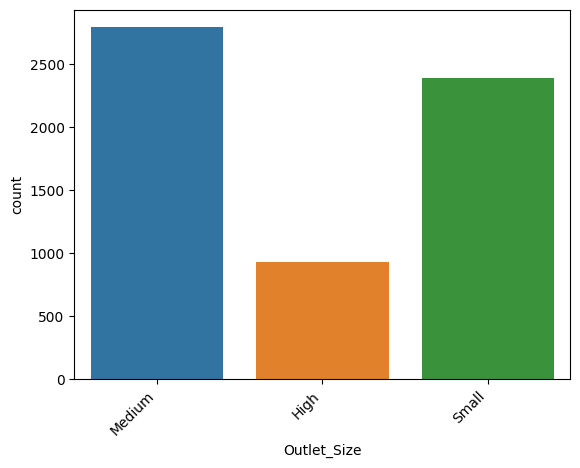

In [40]:
analyze_categorical_feature(Salesdf, 'Outlet_Size');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Size is an ordinal feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *2410/28.28% null values, therefore Given the high percentage of nulls in the data for this feature, it would not be recommended for the rows to be dropped. Therefore the missing values will be filled with a placeholder like 'unknown' or 'missing'*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


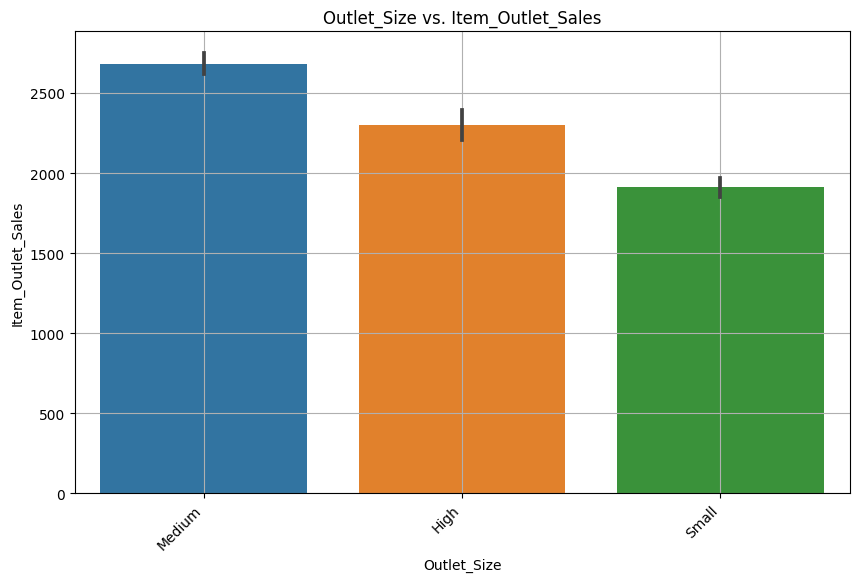

In [41]:
#Plot Outlet_Size against the target
plot_feature_vs_target(Salesdf, 'Outlet_Size')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect bigger outlets to have higher sales than smaller outlets
2. Does this feature appear to be a predictor of the target?
    *   *No, medium outlets seem to have more sales than high sized outlets*





***Outlet_Location_Type***

The type of area in which the store is located


Number of rows with null values in 'Outlet_Location_Type' column: 0
Percentage of null values in 'Outlet_Location_Type' column: 0.00%
'Outlet_Location_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Location_Type' feature is: 3


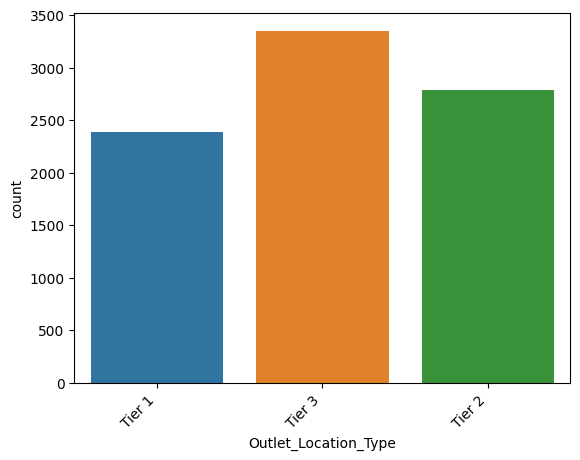

In [42]:
analyze_categorical_feature(Salesdf, 'Outlet_Location_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Location Type is an ordinal feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


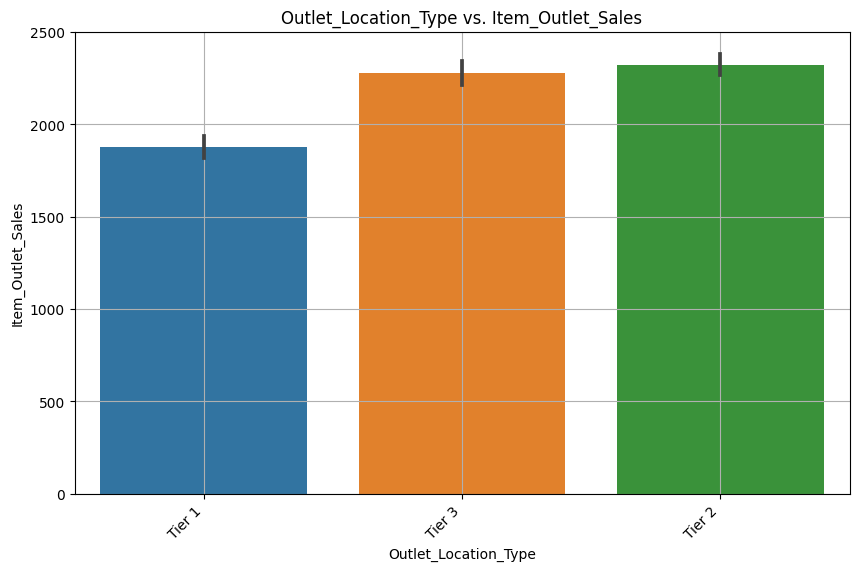

In [43]:
#Plot Outlet_Location_Type against the target
plot_feature_vs_target(Salesdf, 'Outlet_Location_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes*

2. Does this feature appear to be a predictor of the target?
    *   *No, the correlation between this feature and sales is not clear*


***Outlet_Type***

Whether the outlet is a grocery store or some sort of supermarket


Number of rows with null values in 'Outlet_Type' column: 0
Percentage of null values in 'Outlet_Type' column: 0.00%
'Outlet_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Type' feature is: 4


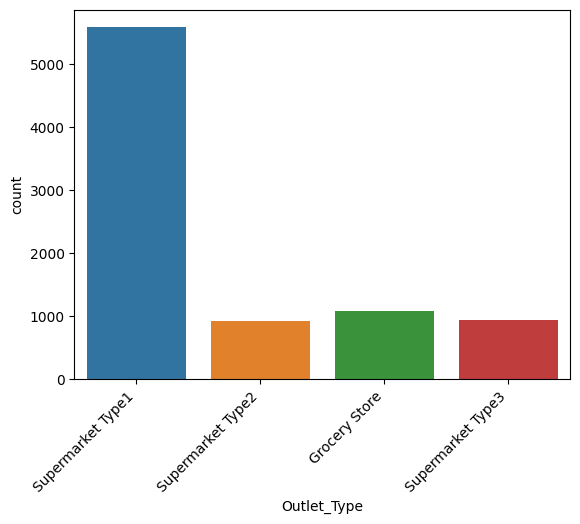

In [44]:
analyze_categorical_feature(Salesdf, 'Outlet_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Type is a cateorical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 4 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


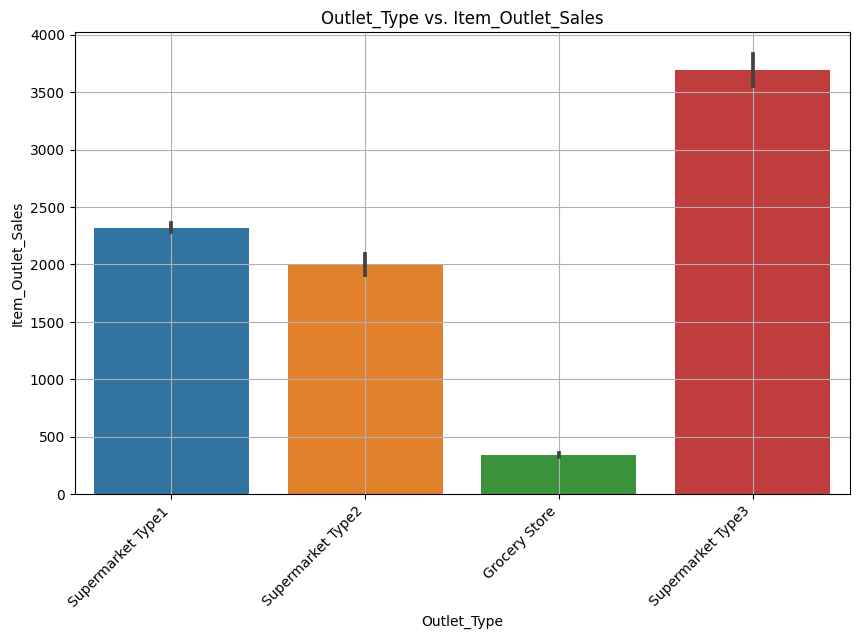

In [45]:
#Plot Outlet_Type against the target
plot_feature_vs_target(Salesdf, 'Outlet_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect certain outlet types to have more sales than other
2. Does this feature appear to be a predictor of the target?
    *   *Yes, Supermarket Type 3 has the most sales*

***Item_Outlet_Sales***

Sales of the product in the particular store. This is the target variable to be predicted.

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Outlet_Sales' is Not constant or quasi-constant.
The cardinality of 'Item_Outlet_Sales' feature is: 3493


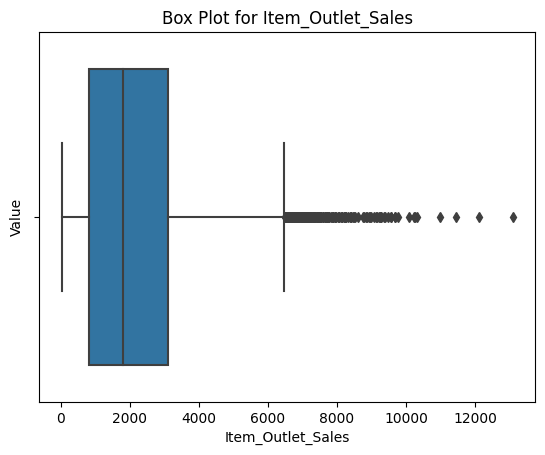

In [46]:
analyze_numeric_feature(Salesdf, 'Item_Outlet_Sales');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3493 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *Yes, because it is the target variable*


## Machine Learning

The project's machine learning part moves from data exploration to the creation and evaluation of regression models. This phase uses machine learning algorithms to translate insights into realistic predictions, improving the project's ability to accurately predict sales trends.


### Data Reloading and Inspection

***Data Load***

In [47]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

set_config(transform_output='pandas')

In [48]:
# Import the data
fpath = "/content/drive/MyDrive/Coding Dojo/Machine Learning/Week 1/sales_predictions_2023.csv"
Newdf = pd.read_csv(fpath)
Newdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


***Data Types***

In [49]:
#check data types
Newdf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [50]:
#change the Outlet Establishment Feature to object
Newdf['Outlet_Establishment_Year'] = Newdf['Outlet_Establishment_Year'].astype(str)
Newdf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

***Duplicates***

In [51]:
#check the number of duplicates
Newdf.duplicated().sum()

0

***Null Values***

In [52]:
#checking null values
Newdf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

***Inconsistent Categories***

In [53]:
#Determining categorical columns from the data
CatColumns = Newdf.select_dtypes(object).columns
CatColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [54]:
#Determining the unique values in the categorical columns
Newdf[CatColumns].nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [55]:
#display the values for all categoriavl columns except for Item_Identifier as it has a lot of values
CatColumns = Newdf.select_dtypes(object).columns.drop('Item_Identifier')

for i in CatColumns:
    print(f'Value counts for {i}')
    print(Newdf[i].value_counts())
    print('\n')

Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     93

In [56]:
#replacing the inconsistent values with the correct values
Newdf['Item_Fat_Content'] = Newdf['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Newdf['Item_Fat_Content'] = Newdf['Item_Fat_Content'].replace('reg','Regular')

***Outliers***

In [57]:
#Check for outliers in the data
Newdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


### Train Test Split

In [58]:
# Defining X and y variables
X = Newdf.drop(columns=['Item_Outlet_Sales', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
y = Newdf['Item_Outlet_Sales']

In [59]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


### Pre-Processing

***Feature Types***

Numerical Features:
  - Item_Weight
  - Item_Visibility
  - Item_MRP

Nominal Features:
  - Item_Identifier
  - Item_Type
  - Outlet_Identifier
  - outlet_Type
  - Outlet_Establishment_Year
  - Item_Fat_Content

Ordinal Features:
  - Outlet_Size
  - Outlet_Location_Type

Numeric Pipeline

In [60]:
#Create lists of column names for numeric, nominal and ordinal features
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
ohe_cols = ['Item_Type', 'Outlet_Type', 'Item_Fat_Content']
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']

#### Pipeline For Preprocessing Numeric Features

In [61]:
#checking Null values in numeric features
X_train[numeric_cols].isna().sum()

Item_Weight        1107
Item_Visibility       0
Item_MRP              0
dtype: int64

In [62]:
# check Summary stats to see data scales
X_train[numeric_cols].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP
count,5285.00,6392.00,6392.00
mean,12.90,0.07,141.98
std,4.64,0.05,62.63
min,4.56,0.00,31.29
25%,8.90,0.03,94.15
50%,12.65,0.05,144.11
75%,17.00,0.09,186.90
max,21.35,0.33,266.89


The numeric features need to be imputed where there are null values. and they need to be scaled. We will Impute the missing values using SimpleImputer with the strategy set to "mean" and Scale the values using StandardScaler

In [63]:
# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [64]:
#Create the pipeline
numerics_pipe = make_pipeline(impute_mean, scaler)
numerics_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

*Define  Numeric Tuple for ColumnTransformer*

In [65]:
num_tuple = ('numeric', numerics_pipe, numeric_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 ['Item_Weight', 'Item_Visibility', 'Item_MRP'])

#### Pipeline For Preprocessing Nominal Features

In [66]:
#checking Null values in nominal train features
X_train[ohe_cols].isna().sum()

Item_Type           0
Outlet_Type         0
Item_Fat_Content    0
dtype: int64

In [67]:
#checking Null values in nominal test features
X_test[ohe_cols].isna().sum()

Item_Type           0
Outlet_Type         0
Item_Fat_Content    0
dtype: int64

There are no null values in nominal features, therefore there is no need for imputation. We will only do one hot encoding. No need to create a pipeline since there is only one preprocessor

In [68]:
# Instantiate the OneHotEncoder preprocessor
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


*Define Nominal Tuple for ColumnTransformer*

In [69]:
nominal_tuple = ('nominal', ohe_encoder, ohe_cols)
nominal_tuple

('nominal',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 ['Item_Type', 'Outlet_Type', 'Item_Fat_Content'])

#### Pipeline For Preprocessing Ordinal Features

In [70]:
#checking Null values in ordinal train features
X_train[ord_cols].isna().sum()

Outlet_Size             1812
Outlet_Location_Type       0
dtype: int64

We will impute the null values with a placeholder 'NA', the encode the features ordinally and scale them.


In [71]:
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

#Specify order of the ordinal features
Outlet_Size_order = ['NA','Small', 'Medium', 'High']
Location_Type_order = ['Tier 1', 'Tier 2', 'Tier 3']

ordinal_cols_orders = [Outlet_Size_order, Location_Type_order]
ord_encoder = OrdinalEncoder(categories=ordinal_cols_orders)

# Making a scaler to scale categories
scaler_ord = StandardScaler()

## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

*Define Ordinal Tuple for ColumnTransformer*

In [72]:
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

#### Column Transformer

In [73]:
#Use the tuples to create a ColumnTransformer to preprocess the data. Make sure to set verbose_feature_names_out to False!
col_transformer = ColumnTransformer([num_tuple, nominal_tuple, ord_tuple], verbose_feature_names_out=False)

In [74]:
#Fit the ColumnTransformer on your training data.
#col_transformer.fit(X_train)

In [75]:
#Transform the training and test data and save them as new variables
#X_train_tf= col_transformer.transform(X_train)
#X_test_tf = col_transformer.transform(X_test)

In [76]:
#Check the transformed training data:
#X_train_tf.head()

In [77]:
#X_train_tf.describe()

In [78]:
#X_train_tf.info()

The final dataframe shows that all the null values have been removed

### Linear Regression

***Creating Model Pipeline***

In [79]:
#Defining the model
model = LinearRegression()
# Create a model pipeline
model_pipeline = make_pipeline(col_transformer, model)
model_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type',
                                                   'Item_Fat_Content']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

***Fit Model Pipeline on Train Data***

In [80]:
# Fitting the model pipeline on the training data
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type',
                                                   'Item_Fat_Content']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

***Evaluate the Model***

In [81]:
#Creating a function for model metrics

def calculate_regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Calculate metrics
    r_squared = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5

    if verbose:
        # Print results with label and underlined header
        header = f"Regression Metrics: {label}"
        underline = '=' * len(header)
        print(header, underline, f"R^2 = {r_squared:.3f}", f"MAE = {mae:.3f}",
              f"MSE = {mse:.3f}", f"RMSE = {rmse:.3f}", sep='\n')

    if output_dict:
        # Return metrics as a dictionary if requested
        metrics = {'Label': label, 'R^2': r_squared, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
        return metrics

def evaluate_regression_model(model, X_train, y_train, X_test, y_test, verbose=True,
                              output_frame=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)

    # Calculate and display regression metrics for training data
    results_train = calculate_regression_metrics(y_train, y_train_pred, verbose=verbose,
                                                 output_dict=output_frame,
                                                 label='Training Data')
    print()

    # Get predictions for test data
    y_test_pred = model.predict(X_test)

    # Calculate and display regression metrics for test data
    results_test = calculate_regression_metrics(y_test, y_test_pred, verbose=verbose,
                                                output_dict=output_frame,
                                                label='Test Data')

    # Store results in a dataframe if output_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        results_df = results_df.set_index('Label')
        return results_df.round(3)


In [82]:
# run the function
evaluate_regression_model(model_pipeline, X_train, y_train, X_test, y_test)

Regression Metrics: Training Data
R^2 = 0.561
MAE = 847.325
MSE = 1300023.710
RMSE = 1140.186

Regression Metrics: Test Data
R^2 = 0.565
MAE = 806.175
MSE = 1199597.407
RMSE = 1095.261


Considering the R-squared values and their similarity, it appears that the model is performing reasonably well and is not exhibiting significant signs of overfitting or underfitting. Both R-squared values are relatively close, indicating that the model's performance on the test data is comparable to its performance on the training data.

### Random Forest Model

***Create Model***

In [83]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_model_pipeline = make_pipeline(col_transformer, rf)
rf_model_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type',
                                                   'Item_Fat_Content']),
                                                 ('ordinal',
                                                  Pipelin...mputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

***Fit Model Pipeline on Train Data***

In [84]:
# Fit the model pipeline on the training data only
rf_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type',
                                                   'Item_Fat_Content']),
                                                 ('ordinal',
                                                  Pipelin...mputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

***Evaluate the Model***

In [85]:
# run the evaluation function on RF Model
evaluate_regression_model(rf_model_pipeline, X_train, y_train, X_test, y_test)

Regression Metrics: Training Data
R^2 = 0.937
MAE = 299.753
MSE = 186883.538
RMSE = 432.300

Regression Metrics: Test Data
R^2 = 0.540
MAE = 781.355
MSE = 1269309.504
RMSE = 1126.636


  The big difference between the training R-squared values and the test R-squared values could be a sign of overfitting. Overfitting happens when the model fits the training data too well, but when it looks at new data, its performance goes down. The high R-squared for training data shows that the model may be picking up noise or outliers in the training data.

Considering the above metrics:

- The R-squared value of the Linear Regression model is a bit higher.
- The MAE of the Random Forest model is a bit higher.
- The MSE and RMSE of the Linear Regression model are slightly better.




### GridSearchCV

In [86]:
# Looking at options for tuning this model
rf_model_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['Item_Weight', 'Item_Visibility',
                                     'Item_MRP']),
                                   ('nominal',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Item_Type', 'Outlet_Type',
                                     'Item_Fat_Content']),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleI

In [87]:
# Define a dictionary of parameters to search and the values to try
param_grid = {
    'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],  # Maximum depth of the decision trees
    'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Minimum samples required in a leaf node
    'randomforestregressor__min_samples_split': [2, 3, 4]  # Minimum samples required to split an internal node
}

In [88]:
# Instantiate GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model_pipeline, param_grid, n_jobs=-1, verbose=1)

In [89]:
# Fit the GridSearch on the training data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Item_Weight',
                                                                          'Item_Visibility',
                                                                          'Item_MRP']),
                                                                        ('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Item_Type',
                                                                          'Outlet_Type',
                                                                          'Item_Fat_Conten...
                                                                         ['Outlet_Size',
                                                                          'Outlet_Location_Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'randomforestregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [90]:
# Obtain the best combination of hyperparameters
best_params = grid_search.best_params_



In [91]:
# Instantiate a new model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Predict and evaluate using the custom function
evaluate_regression_model(best_rf_model, X_train, y_train, X_test, y_test)

Regression Metrics: Training Data
R^2 = 0.611
MAE = 755.381
MSE = 1152553.402
RMSE = 1073.570

Regression Metrics: Test Data
R^2 = 0.603
MAE = 728.453
MSE = 1096307.534
RMSE = 1047.047


While the default Random Forest model originally had better R-squared values, the refined Random Forest model has improved in terms of MAE, MSE, and RMSE. It means that the refined model performs better in terms of prediction accuracy and error reduction. As a result, even though the R-squared values on the training data reduced a bit after adjusting, the model's performance increased.


###Model Evaluation

***Recommendation***

The Tuned Random Forest model is recommened as the most suitable option for predicting sales.

- On the test data, the Tuned Random Forest model has a better R-squared value (0.603) than the Linear Regression (0.565) and default Random Forest (0.540) models.
- In comparison to the standard Random Forest model, the Tuned Random Forest model shows reduced values for the test data's major error metrics (MAE, MSE, RMSE).Achieving a balance between over- and underfitting
- The Random Forest models show significant variability in their R-squared values on training and test data, although the Linear Regression model seems to perform well on both training and test data. With a good R-squared value on both training and test data, the Tuned Random Forest model achieves a better balance, indicating a lower danger of overfitting.
- The Tuned Random Forest model demonstrates its flexibility and dependability in predicting sales by delivering consistent and improved performance across various metrics (R-squared, MAE, MSE, RMSE) on both training and test datasets.

***Conclusion***

The R-squared number tells us how well our prediction model explains the differences in sales data. A higher R-squared number means that the model is better at capturing and understanding the factors that affect sales. In our case, the R-squared number is about 0.603, which means that the model can explain about 60.3% of the variation in sales. This shows that the model is a pretty good reflection of how sales work in the real world.

I have used the Mean Absolute Error (MAE) number to measure how well the model works. MAE measures the average size of the difference between what was predicted and what actually happened. The MAE of the model is about 728.453. This means that, on average, we are off by about $728 with the predictions. This gives us a clear, easy-to-understand way to measure how accurate our sales predictions are. I selected MAE because it makes it clear how far off our sales estimates are from the real sales numbers. It's easy to understand and shows how big the mistakes are in terms of dollars units, so people can relate to it.

When I compare how well the model performs on the training data to how well it performs on the test data, we see that the R-squared value on the training data is about 0.611 and on the test data it's about 0.603. This small difference shows that the model's performance on new data is similar to its performance on the data it was trained on. This means that the model is well-balanced and not overfit or underfit. Both R-squared values are pretty close, which means that our model works well with new data and avoiding the typical mistakes of overfitting (being too specific to the training data) or underfitting (being too simple to see the trends).

